# Filtragem no domínio da frequência

Filtering operations can be performed in both the space and frequency domains. Frequency filters are typically classified into three categories:

- low pass,
- high passes and
- bandpass.

The visual effect of a low-pass filter is to soften the image, since high frequencies, which correspond to abrupt transitions, are attenuated. Smoothing also tends, for the same reasons, to minimize the effect of noise in images. A high-pass filter enhances high frequencies and is typically used to enhance details in the image. The effect obtained is, in general, the enhancement of edges. A band-pass filter selects a range of signal frequencies to be enhanced.
Frequency filtering using the Convolution Theorem

The Convolution Theorem guarantees that convolution in the spatial domain is equivalent to a product in the frequency domain. In other words, instead of applying a filter in the spatial domain through the convolution of the image $f(x,y)$ with a mask $h(x,y)$ we can apply a filter in the frequency domain through the product of the Transform of Fourier of the image $F(u,v)$ with the Fourier Transform of the mask (filter) $H(u,v)$.

## 1. Low Pass Filters

Edges and other abrupt transitions (such as noise) in an image's gray levels contribute significantly to the high-frequency content of an image. Thus, smoothing is achieved in the frequency domain by attenuating a specific range of high-frequency components in the transform of an image.

### 1.1 Optimal low pass filter

An ideal two-dimensional low-pass filter is one whose transfer function satisfies the relation
$$ H(u,v) = \begin{cases}
1, & \text{se $D(u,v)\leq{D_0}$}\\
0, & \text{if $D(u,v)>{D_0}$}
\end{cases}$$

where $D_0$ is a specific non-negative value and $D(u, v)$ is the distance from the point $(u,v)$ to the origin of the frequency plane. Normally $D_0$ is called cutoff frequency.

### Example

The Figure below illustrates each of the steps involved in the process of applying an ideal low-pass filter to an image.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy.fft import fft2, ifft2
import sys,os


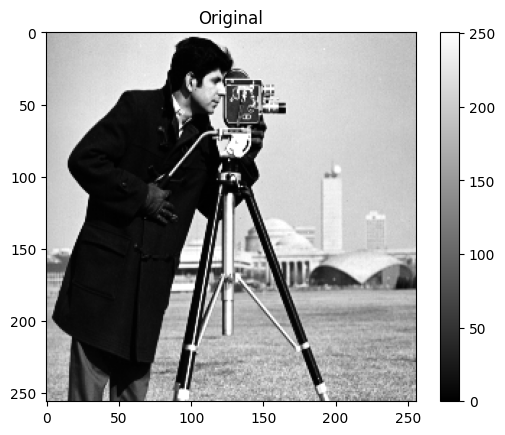

In [2]:
f = mpimg.imread('../figures/cameraman.tif')
plt.imshow(f,cmap='gray');
plt.title('Original')
plt.colorbar()
plt.show()

In [3]:
def circle(s, r, c):
    
    rows, cols = s[0], s[1]
    rr0,  cc0  = c[0], c[1]
    rr, cc = np.meshgrid(range(rows), range(cols), indexing='ij')
    g = (rr - rr0)**2 + (cc - cc0)**2 <= r**2
    return g


In [4]:
def ptrans(f,t):
    g = np.empty_like(f) 
    if f.ndim == 1:
        W = f.shape[0]
        col = np.arange(W)
        g = f[(col-t)%W]
    elif f.ndim == 2:
        H,W = f.shape
        rr,cc = t
        row,col = np.indices(f.shape)
        g = f[(row-rr)%H, (col-cc)%W]
    elif f.ndim == 3:
        Z,H,W = f.shape
        zz,rr,cc = t
        z,row,col = np.indices(f.shape)
        g = f[(z-zz)%Z, (row-rr)%H, (col-cc)%W]
    return g

Text(0.5, 1.0, 'Filtro Passa-baixas ideal')

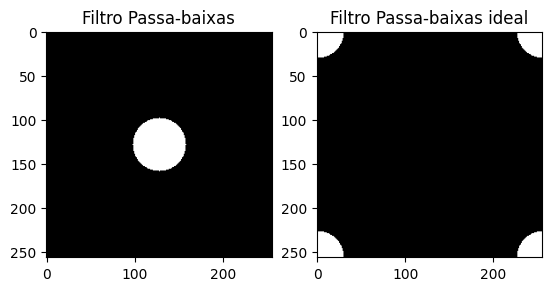

In [5]:
# Creating the ideal filter (circle) in frequency
H = circle(f.shape, 30, np.divide(f.shape, 2))
x,y = f.shape
HPB_ideal = ptrans(H,(x//2,y//2))

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(H,cmap='gray');
plt.title('Filtro Passa-baixas')

plt.subplot(1,2,2)
plt.imshow(HPB_ideal,cmap='gray');
plt.title('Filtro Passa-baixas ideal')


In [6]:
# Filtering the image in the frequency domain
F = fft2(f)
G = F * HPB_ideal
gg = ifft2(G)

Text(0.5, 1.0, 'Image filtering')

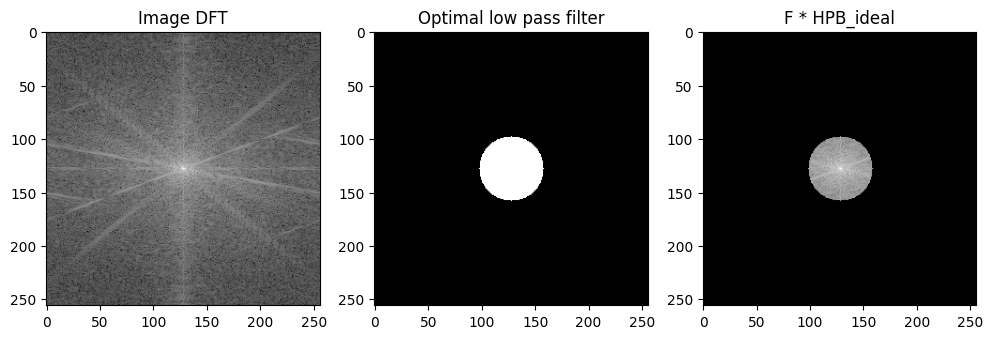

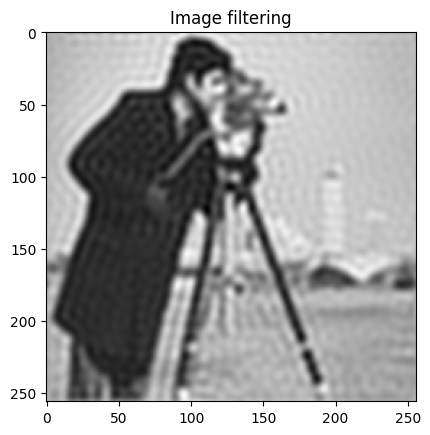

In [9]:

plt.figure(1, figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(ptrans(F,(x//2,y//2))+1)),cmap='gray')
plt.title('Image DFT')

plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(ptrans(HPB_ideal,(x//2,y//2))+1)),cmap='gray')
plt.title('Optimal low pass filter')

plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(ptrans(G,(x//2,y//2))+1)),cmap='gray')
plt.title('F * HPB_ideal')

plt.figure(2)
#plt.subplot(1,4,4)
plt.imshow(gg.real.astype(np.float16),cmap='gray');
plt.title('Image filtering')


To understand the effects observed when filtering with the ideal filter, let's visualize the ideal filter in space.

Text(0.5, 1.0, 'hpb_ideal')

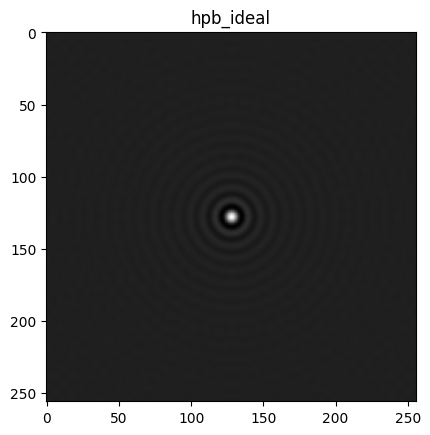

In [10]:
hpb_ideal = ifft2(HPB_ideal)
                        
plt.imshow(np.log(np.abs(ptrans(hpb_ideal,(x//2,y//2))+1)),cmap='gray');
plt.title('hpb_ideal')

## 2. High pass filters

When what we are looking for in an image are precisely the edges, that is, the high-frequency content of an image, we use a high-pass filter, attenuating a specific range of low-frequency components.

2.1 Ideal high-pass filter

An ideal two-dimensional high-pass filter is one whose transfer function satisfies the relation
$$ H(u,v) = \begin{cases}
0, & \text{se $D(u,v)\leq{D_0}$}\\
1, & \text{if $D(u,v)>{D_0}$}
\end{cases}$$

where $D_0$ is a specific non-negative value and $D(u, v)$ is the distance from the point $(u,v)$ to the origin of the frequency plane. Here also $D_0$ is called cutoff frequency.

Text(0.5, 1.0, 'H_ideal')

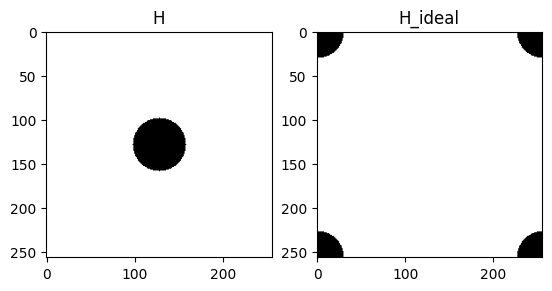

In [11]:
# Creating the ideal filter (circle) in frequency
HPA = 1 - circle(f.shape, 30, np.divide(f.shape, 2))
x,y = f.shape
HPA_ideal = ptrans(HPA,(x//2,y//2))

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(HPA,cmap='gray');
plt.title('H')

plt.subplot(1,2,2)
plt.imshow(HPA_ideal,cmap='gray');
plt.title('H_ideal')

In [12]:
# Filtrando a imagem no domínio da frequência
F = fft2(f)
G2 = F * HPA_ideal
gg2 = ifft2(G2)

Text(0.5, 1.0, 'Image filtering')

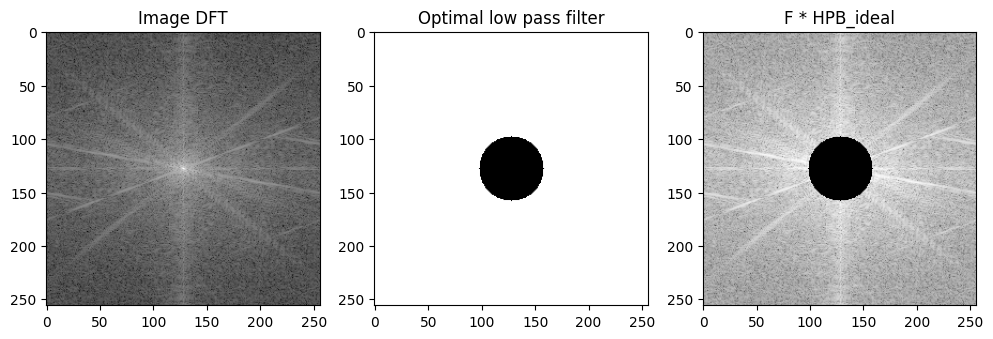

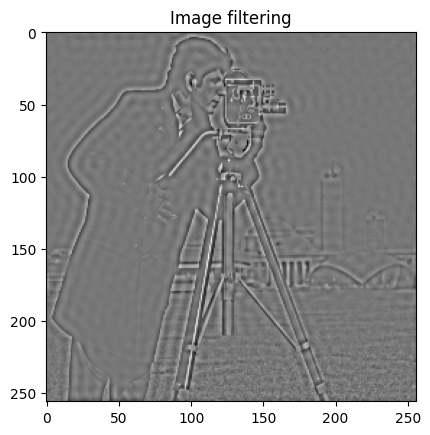

In [15]:
plt.figure(1, figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(ptrans(F,(x//2,y//2))+1)),cmap='gray')
plt.title('Image DFT')

plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(ptrans(HPA_ideal,(x//2,y//2))+1)),cmap='gray')
plt.title('Optimal low pass filter')

plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(ptrans(G2,(x//2,y//2))+1)),cmap='gray')
plt.title('F * HPB_ideal')

plt.figure(2)
#plt.subplot(1,4,4)
plt.imshow(gg2.real.astype(np.float16),cmap='gray');
plt.title('Image filtering')
